# L2: Deploying Segmentation Models On-Device


<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

[FFNet Paper](https://arxiv.org/abs/2206.08236)

In [1]:
from qai_hub_models.models.ffnet_40s import Model

In [3]:
from torchinfo import summary

In [4]:
# Load from pre-trained weights
model = Model.from_pretrained()
input_shape = (1, 3, 1024, 2048)
stats = summary(model, 
  input_size=input_shape, 
  col_names=["num_params", "mult_adds"]
)
print(stats)

100%|██████████| 55.8M/55.8M [00:06<00:00, 8.11MB/s]


Done
cityscapes_segmentation requires repository https://github.com/Qualcomm-AI-research/FFNet.git . Ok to clone? [Y/n] Please respond with 'yes' or 'no' (or 'y' or 'n').

cityscapes_segmentation requires repository https://github.com/Qualcomm-AI-research/FFNet.git . Ok to clone? [Y/n] Cloning https://github.com/Qualcomm-AI-research/FFNet.git to C:\Users\LENOVO X1E\.qaihm\models\cityscapes_segmentation\v2\Qualcomm-AI-research_FFNet_git...
Done
Loading pretrained model state dict from C:\Users\LENOVO X1E\.qaihm\models\ffnet\v1\ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Layer (type:depth-idx)                                       Param #                   Mult-Adds
FFNet40S                                                     --                        --
├─FFNet: 1-1                                                 --                        --
│    └─ResNetS: 2-1                                          --                        --
│ 

## Exercise: Try another variant of FFNet

In [5]:
# High resolution variants
from qai_hub_models.models.ffnet_40s import Model
#from qai_hub_models.models.ffnet_54s import Model
#from qai_hub_models.models.ffnet_78s import Model

# Low resolution variants
low_res_input_shape = (1, 3, 512, 1024)
#from qai_hub_models.models.ffnet_78s_lowres import Model
#from qai_hub_models.models.ffnet_122ns_lowres import Model

model = Model.from_pretrained()
stats = summary(model, 
  input_size=input_shape, # use low_res_input_shape for low_res models
  col_names=["num_params", "mult_adds"]
)
print(stats)

Loading pretrained model state dict from C:\Users\LENOVO X1E\.qaihm\models\ffnet\v1\ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Layer (type:depth-idx)                                       Param #                   Mult-Adds
FFNet40S                                                     --                        --
├─FFNet: 1-1                                                 --                        --
│    └─ResNetS: 2-1                                          --                        --
│    │    └─Conv2d: 3-1                                      864                       452,984,832
│    │    └─BatchNorm2d: 3-2                                 64                        64
│    │    └─ReLU: 3-3                                        --                        --
│    │    └─Conv2d: 3-4                                      18,432                    2,415,919,104
│    │    └─BatchNorm2d: 3-5                                 128      

## Setup AI Hub for device-in-the-loop deployment

In [6]:
import qai_hub

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [7]:
from utils import get_ai_hub_api_token
ai_hub_api_token = get_ai_hub_api_token()

!qai-hub configure --api_token $ai_hub_api_token

qai-hub configuration saved to C:\Users\LENOVO X1E/.qai_hub/client.ini
==================== C:\Users\LENOVO X1E/.qai_hub/client.ini ====================
[api]
api_token = 3f998f56035152a488df300378537e23f2168f02
api_url = https://app.aihub.qualcomm.com
web_url = https://app.aihub.qualcomm.com
verbose = True




100%|██████████| 443k/443k [00:00<00:00, 672kB/s] 


Done
Loading pretrained model state dict from C:\Users\LENOVO X1E\.qaihm\models\ffnet\v1\ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Running Inference on 0 samples


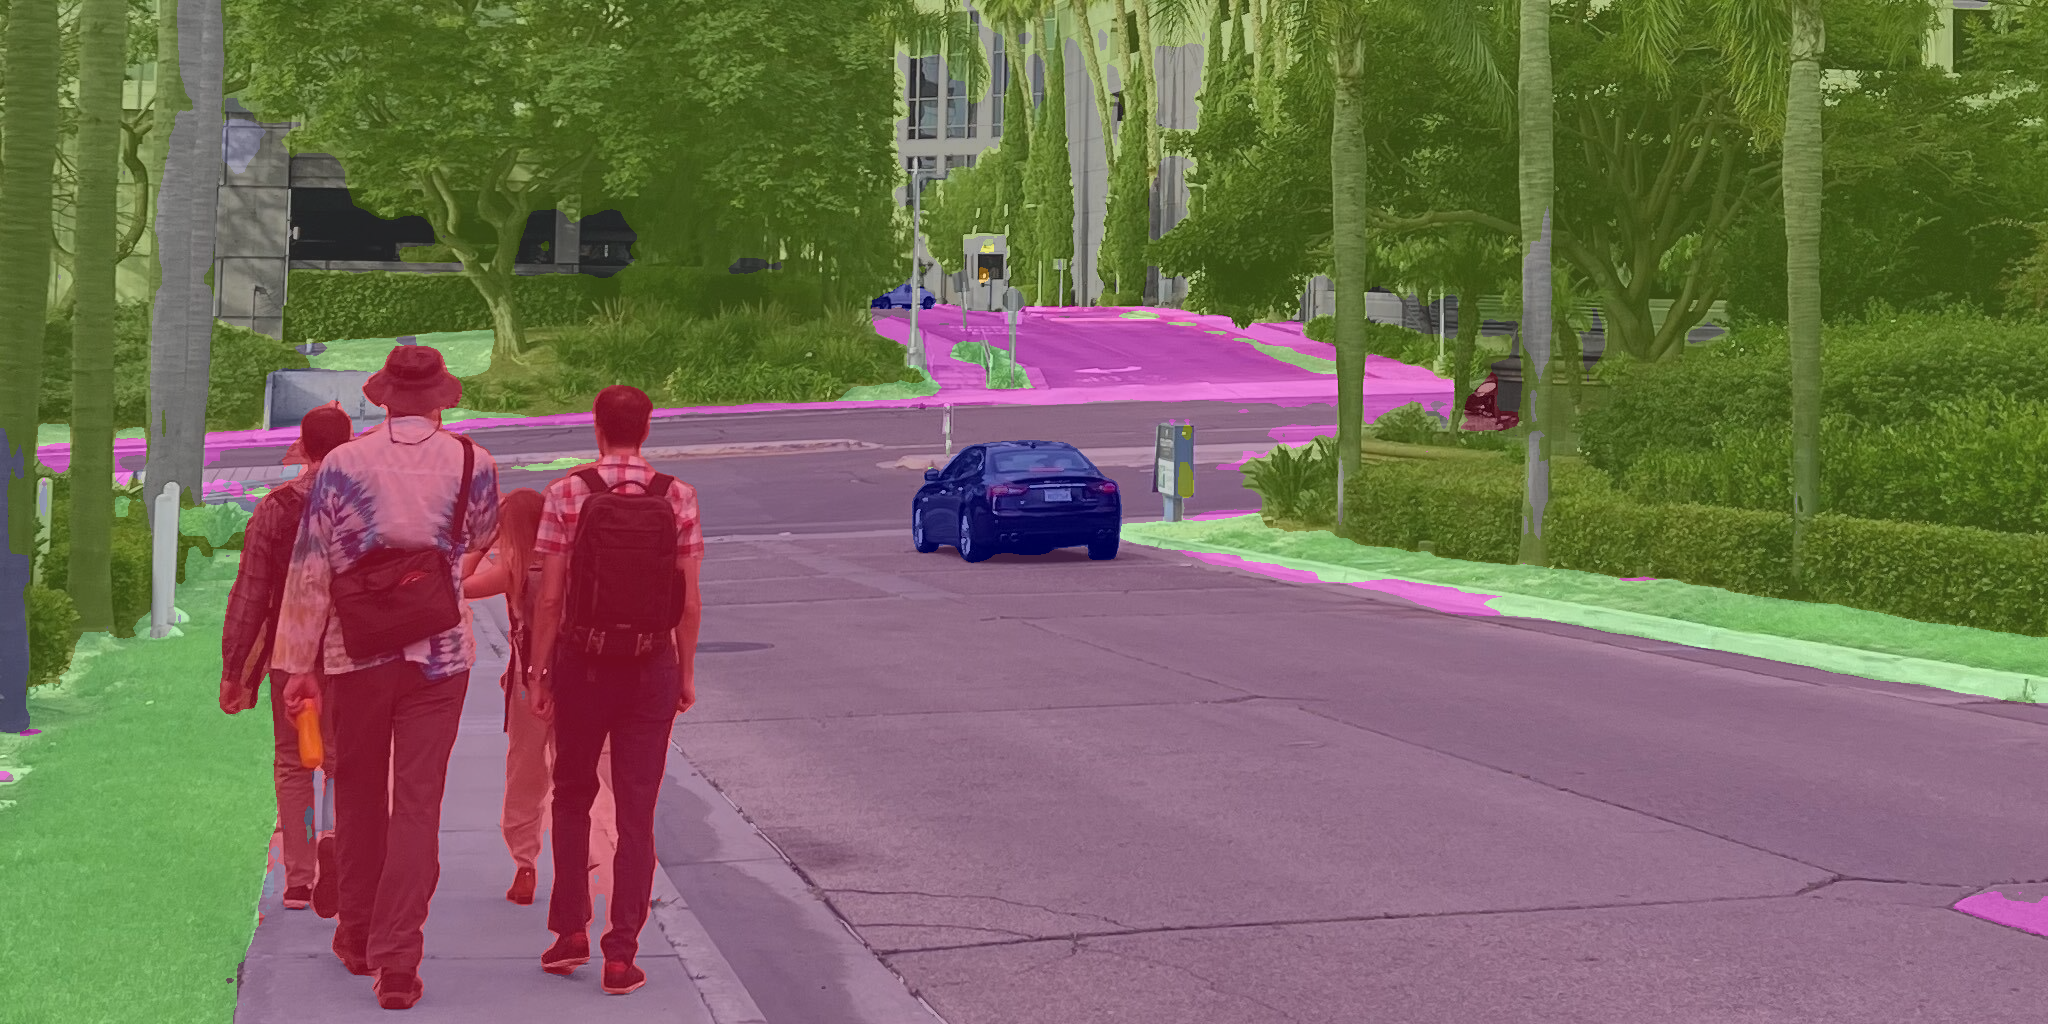

In [8]:
%run -m qai_hub_models.models.ffnet_40s.demo

## Run on a real smart phone!

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note:</b> To spread the load across various devices, we are selecting a random device. Feel free to change it to any other device you prefer.</p>

In [9]:
devices = [
    "Samsung Galaxy S22 Ultra 5G",
    "Samsung Galaxy S22 5G",
    "Samsung Galaxy S22+ 5G",
    "Samsung Galaxy Tab S8",
    "Xiaomi 12",
    "Xiaomi 12 Pro",
    "Samsung Galaxy S22 5G",
    "Samsung Galaxy S23",
    "Samsung Galaxy S23+",
    "Samsung Galaxy S23 Ultra",
    "Samsung Galaxy S24",
    "Samsung Galaxy S24 Ultra",
    "Samsung Galaxy S24+",
]

import random
selected_device = random.choice(devices)
print(selected_device)

Samsung Galaxy S22 Ultra 5G


In [10]:
%run -m qai_hub_models.models.ffnet_40s.export -- --device "$selected_device"

Loading pretrained model state dict from C:\Users\LENOVO X1E\.qaihm\models\ffnet\v1\ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Optimizing model ffnet_40s to run on-device
Uploading tmperis6vtg.pt


100%|██████████| 53.6M/53.6M [00:06<00:00, 8.83MB/s]


Scheduled compile job (jpx9dmj9p) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jpx9dmj9p/

Profiling model ffnet_40s on a hosted device.
Waiting for compile job (jpx9dmj9p) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          
Scheduled profile job (jgn07xym5) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jgn07xym5/

Running inference for ffnet_40s on a hosted device with example inputs.


Uploading dataset: 21.5MB [00:02, 7.58MB/s]                            11.6MB/s]


Scheduled inference job (jpr6n9qep) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jpr6n9qep/



ffnet_40s.tflite: 100%|██████████| 53.1M/53.1M [00:03<00:00, 14.7MB/s]


Downloaded model to E:\AUNUUN JEFFRY MAHBUUBI\Programming\DEEPLEARNINGAI\Introduction to on-device AI\CODE\build\ffnet_40s\ffnet_40s.tflite
Waiting for profile job (jgn07xym5) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          

------------------------------------------------------------
Performance results on-device for Ffnet_40S.
------------------------------------------------------------
Device                          : Samsung Galaxy S22 Ultra 5G (12)
Runtime                         : TFLITE                          
Estimated inference time (ms)   : 28.3                            
Estimated peak memory usage (MB): [2, 73]                         
Total # Ops                     : 92                              
Compute Unit(s)                 : NPU (92 ops)                    
------------------------------------------------------------
More details: https://app.aihub.qualcomm.com/jobs/jgn07xym5/



tmpnwb922r8.h5: 100%|██████████| 1.22M/1.22M [00:00<00:00, 2.49MB/s]



Comparing on-device vs. local-cpu inference for Ffnet_40S.
+---------------+-------------------+--------+
| output_name   | shape             |   psnr |
+===============+===================+========+
| mask          | (1, 128, 256, 19) |  66.24 |
+---------------+-------------------+--------+

- psnr: Peak Signal-to-Noise Ratio (PSNR). >30 dB is typically considered good.

More details: https://app.aihub.qualcomm.com/jobs/jpr6n9qep/

Run compiled model on a hosted device on sample data using:
python C:\Users\LENOVO X1E\.conda\envs\HUGGINGFACE\Lib\site-packages\qai_hub_models\models\ffnet_40s\demo.py --on-device --hub-model-id mmre98e6n --device "Samsung Galaxy S22 Ultra 5G"



<p style="background-color:#fff1d7; padding:15px; "> <b>Note</b>: To view the URL for each job, you require login. You can experience sample results in the following urls.</p>

* [FFNet 40s](https://aihub.qualcomm.com/mobile/models/ffnet_40s)
* [FFNet 54s](https://aihub.qualcomm.com/mobile/models/ffnet_54s)
* [FFNet 78s](https://aihub.qualcomm.com/mobile/models/ffnet_78s)
* [FFNet 78s-low-res](https://aihub.qualcomm.com/mobile/models/ffnet_78s_lowres)
* [FFNet 122ns-low-res](https://aihub.qualcomm.com/mobile/models/ffnet_122ns_lowres)

## On Device Demo

Compiling on-device model asset for ffnet_40s.
Running python -m qai_hub_models.models.ffnet_40s.export --device Samsung Galaxy S22 Ultra 5G --target-runtime tflite

Loading pretrained model state dict from C:\Users\LENOVO X1E\.qaihm\models\ffnet\v1\ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Optimizing model ffnet_40s to run on-device
Uploading tmpvwyewk2o.pt


100%|██████████| 53.6M/53.6M [00:06<00:00, 9.37MB/s]


Scheduled compile job (j5q0mwkmp) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j5q0mwkmp/

Waiting for compile job (j5q0mwkmp) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          
Exported asset: ffnet_40s

Running Inference on 0 samples


Uploading dataset: 7.42MB [00:01, 4.49MB/s]                            7.30MB/s]


Scheduled inference job (jgl417zl5) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jgl417zl5/

Waiting for inference job (jgl417zl5) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          


tmpcfbpeusa.h5: 100%|██████████| 1.32M/1.32M [00:00<00:00, 2.68MB/s]


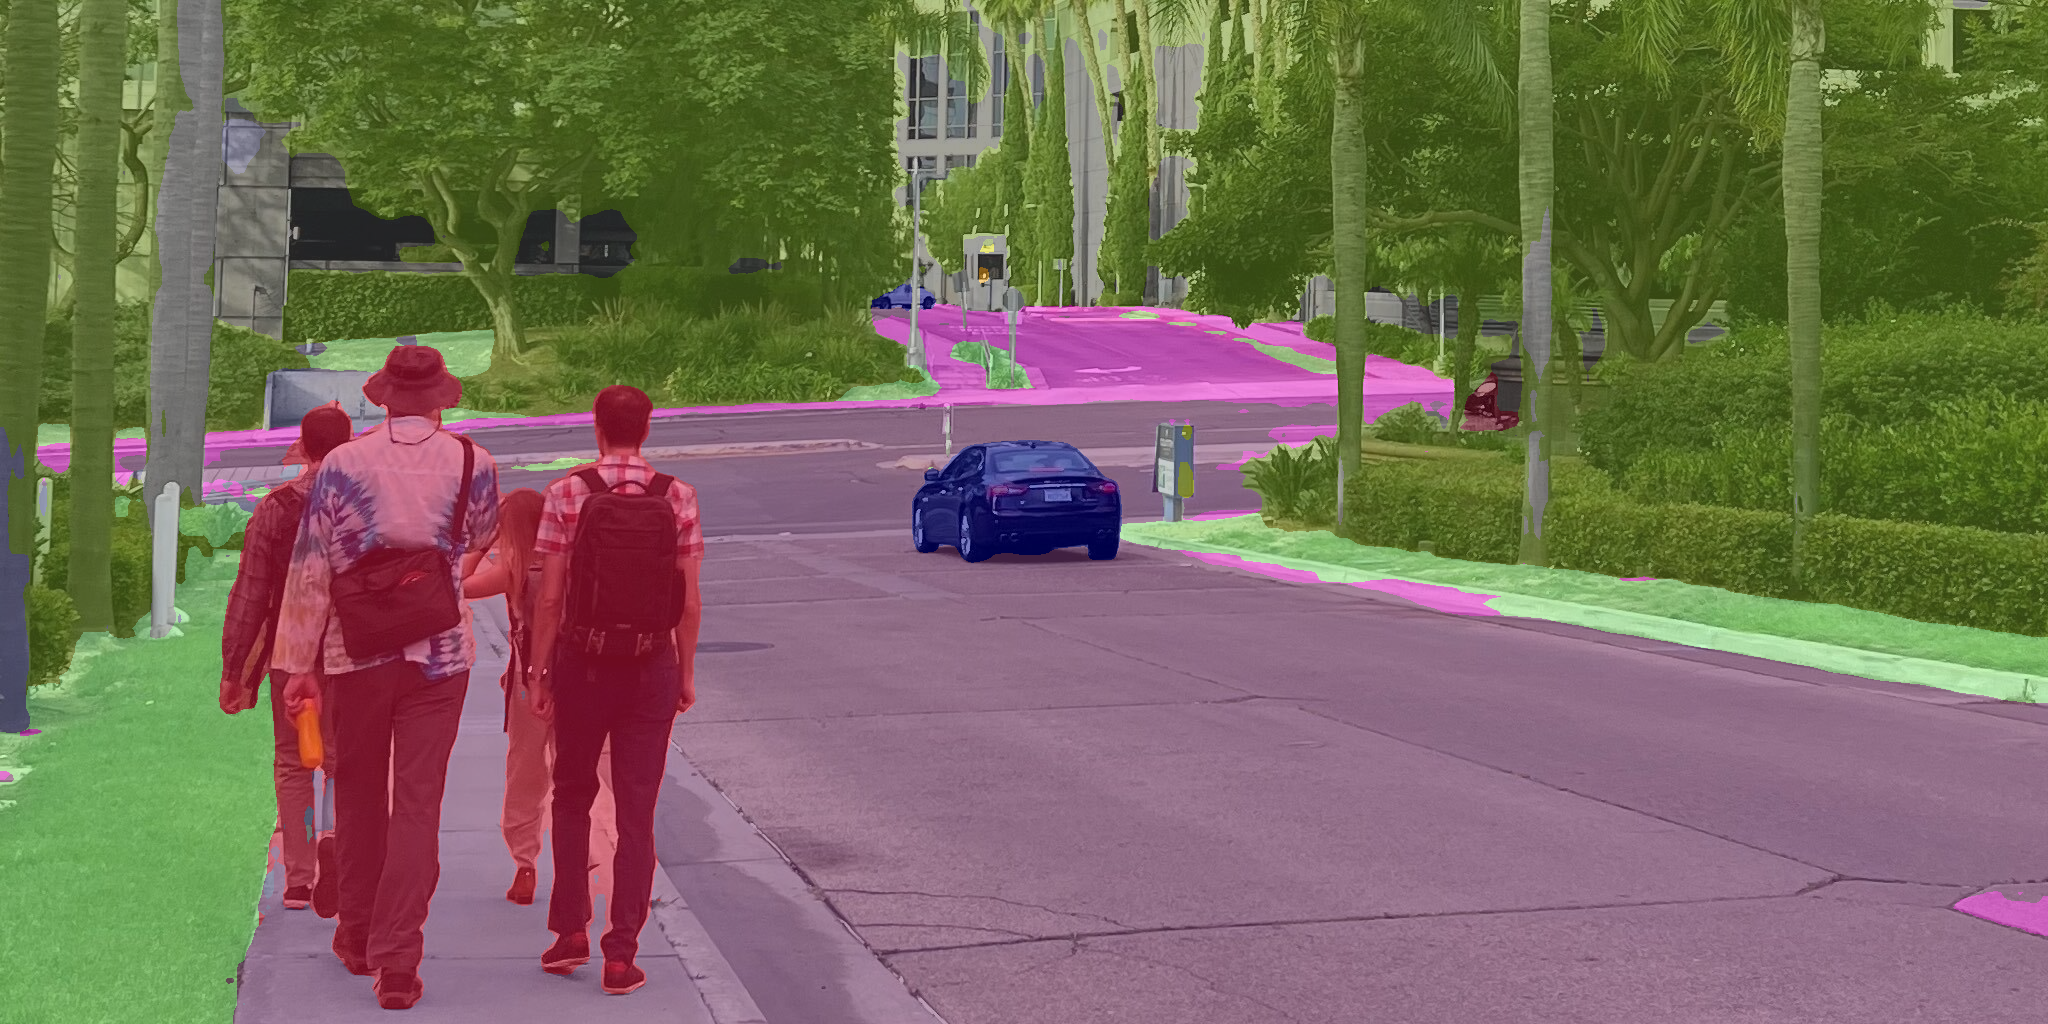

In [11]:
%run -m qai_hub_models.models.ffnet_40s.demo -- --device "$selected_device" --on-device